# Workings

This is my second markdown cell.

The first one was used to create the heading above: hash space Workings, for the eponymous level 1 heading. Add hashes for level 2, 3, etc. Don't select Heading in the dropdown on the toolbar for headings; select Markdown!

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

ImportError: No module named keras.datasets

(Saving errors for the record because it'll probably work - eventually.)

Got this: ImportError: No module named keras.datasets.

Opening a new terminal from the main jupyter_notebooks tab, to see what I can do with Python.

I have Keras (according to pip list), but not tensorFlow, which python (in the terminal) complains about when I try "import keras". Install by pip and try again? Seems OK. Trying again here.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


ImportError: No module named google.protobuf

(Saving errors.)

ImportError: No module name google.protobuf - although I apparently have protobuf: pip install protobuf gives "Requirement already satisfied". So I'll try to pip uninstall protobuf and then tensorflow and then install tensorflow again.

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


ImportError: cannot import name pywrap_tensorflow

In [3]:
import numpy as np

In [4]:
from tensorflow.python import pywrap_tensorflow

ImportError: cannot import name pywrap_tensorflow

In [5]:
python --version

NameError: name 'python' is not defined

In [6]:
import sys
sys.version_info

sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)

In [1]:
from tensorflow.python import pywrap_tensorflow

So I did File - Close and Halt and then re-opened the notebook to try again. It seems to be working now...

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


Yup.

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

10493952/11490434 [==========================>...] - ETA: 0s

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

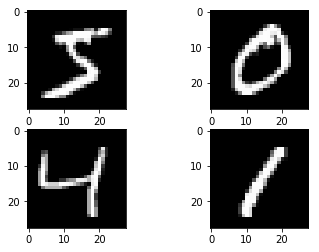

In [5]:
# show the plot
plt.show()

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2793 - acc: 0.9209 - val_loss: 0.1416 - val_acc: 0.9574
Epoch 2/10
3s - loss: 0.1118 - acc: 0.9676 - val_loss: 0.0927 - val_acc: 0.9706
Epoch 3/10
3s - loss: 0.0720 - acc: 0.9797 - val_loss: 0.0785 - val_acc: 0.9771
Epoch 4/10
3s - loss: 0.0503 - acc: 0.9858 - val_loss: 0.0749 - val_acc: 0.9766
Epoch 5/10
3s - loss: 0.0374 - acc: 0.9895 - val_loss: 0.0679 - val_acc: 0.9785
Epoch 6/10
3s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0633 - val_acc: 0.9807
Epoch 7/10
3s - loss: 0.0210 - acc: 0.9947 - val_loss: 0.0625 - val_acc: 0.9807
Epoch 8/10
3s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0634 - val_acc: 0.9800
Epoch 9/10
3s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0586 - val_acc: 0.9804
Epoch 10/10
3s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0591 - val_acc: 0.9817
Baseline Error: 1.83%


Baseline error slightly less than the web page suggested. Nothing to do with me...

In [11]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [12]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [16]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
79s - loss: 0.2340 - acc: 0.9341 - val_loss: 0.0817 - val_acc: 0.9743
Epoch 2/10
78s - loss: 0.0735 - acc: 0.9782 - val_loss: 0.0466 - val_acc: 0.9842
Epoch 3/10
78s - loss: 0.0533 - acc: 0.9840 - val_loss: 0.0440 - val_acc: 0.9860
Epoch 4/10
78s - loss: 0.0405 - acc: 0.9876 - val_loss: 0.0400 - val_acc: 0.9870
Epoch 5/10
79s - loss: 0.0337 - acc: 0.9895 - val_loss: 0.0360 - val_acc: 0.9881
Epoch 6/10
79s - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0319 - val_acc: 0.9894
Epoch 7/10
80s - loss: 0.0235 - acc: 0.9927 - val_loss: 0.0359 - val_acc: 0.9882
Epoch 8/10
79s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0327 - val_acc: 0.9885
Epoch 9/10
80s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0304 - val_acc: 0.9899
Epoch 10/10
81s - loss: 0.0145 - acc: 0.9956 - val_loss: 0.0320 - val_acc: 0.9904
Baseline Error: 0.96%


That took a long time! Web page mentions use of a GPU on AWS, which would help.

Again, the baseline error is better - but that could be due the so-called random dropout above.

About to do "Larger Convolutional Neural Network for MNIST," which I suspect will make even greater demands on my MBP!

(To be continued.)

In [1]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


In [2]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [3]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 92s - loss: 0.3930 - acc: 0.8790 - val_loss: 0.1015 - val_acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 91s - loss: 0.0945 - acc: 0.9707 - val_loss: 0.0600 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 92s - loss: 0.0687 - acc: 0.9790 - val_loss: 0.0365 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 92s - loss: 0.0559 - acc: 0.9824 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 91s - loss: 0.0478 - acc: 0.9850 - val_loss: 0.0291 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 91s - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0276 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 91s - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0271 - val_acc: 0.9912
Epoch 8/10
60000/60000 [==============================

Slow, indeed.

That's as far as it goes with Python. I just need to understand what's going on.

# Resources

The MNIST dataset is very well studied. Below are some additional resources you might like to look into.

The Official MNIST dataset webpage.
Rodrigo Benenson’s webpage that lists state of the art results.
Kaggle competition that uses this dataset (check the scripts and forum sections for sample code)
Read-only model trained on MNIST that you can test in your browser (very cool)

The URLs didn't work: I simply pasted a snippet form the web page. Need markdown!

(From the webpage.)

The MNIST dataset is very well studied. Below are some additional resources that you might like to look into.
* [The Official MNIST dataset webpage](http://yann.lecun.com/exdb/mnist/)
* [Rodrigo Benenson's webpage that lists state of the art results](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354)
* [Kaggle competition that uses this dataset](https://www.kaggle.com/c/digit-recognizer) (check the scripts and forum sections for sample code)
* [Read-only model trained on MNIST that you can test in your browser](http://myselph.de/neuralNet.html) (very cool)

# Conclusions and Further Steps

As people have pointed out on the webpage, there is no indication of how to use the recogniser!

Try following the links to the resources? The 'very cool' one has some Javascript to read.

After this: Teeline-Recog? For Android, using Kivy?